/var/folders/c5/00kj5vrd7qd3b5q3c79llp540000gn/T/ipykernel_93712/3440620476.py:24: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


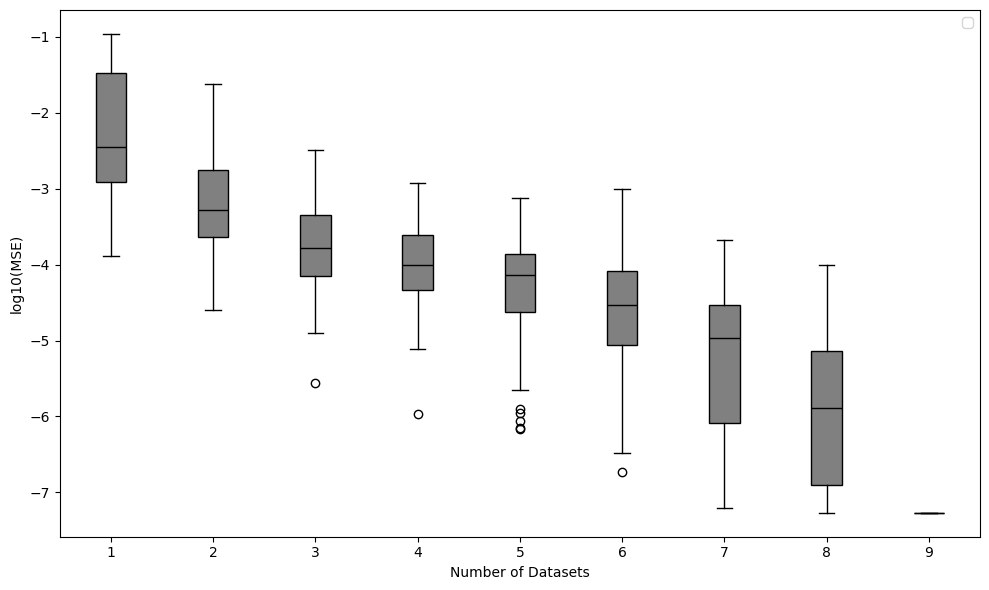

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load file names

data_df = pd.read_csv('Data/data_comparison.csv')
data = data_df[['Number of Files', 'MSE', 'Name']].values

fig, ax = plt.subplots(figsize=(10, 6))

x_all = sorted(set(int(n) for n, _, _ in data))

# Scatter plot
scatter_data = [(int(n), l) for n, l, _ in data]
for x in x_all:
    y_vals = [l for n, l, combo in data if int(n) == x]
    ax.boxplot([y_vals], positions=[x], widths=0.3, patch_artist=True,
                   boxprops=dict(facecolor='grey'),
                   medianprops=dict(color='black'))

ax.set_xlabel('Number of Datasets')
ax.set_ylabel('log10(MSE)')
ax.legend()

plt.tight_layout()
plt.show()

# Save the figure


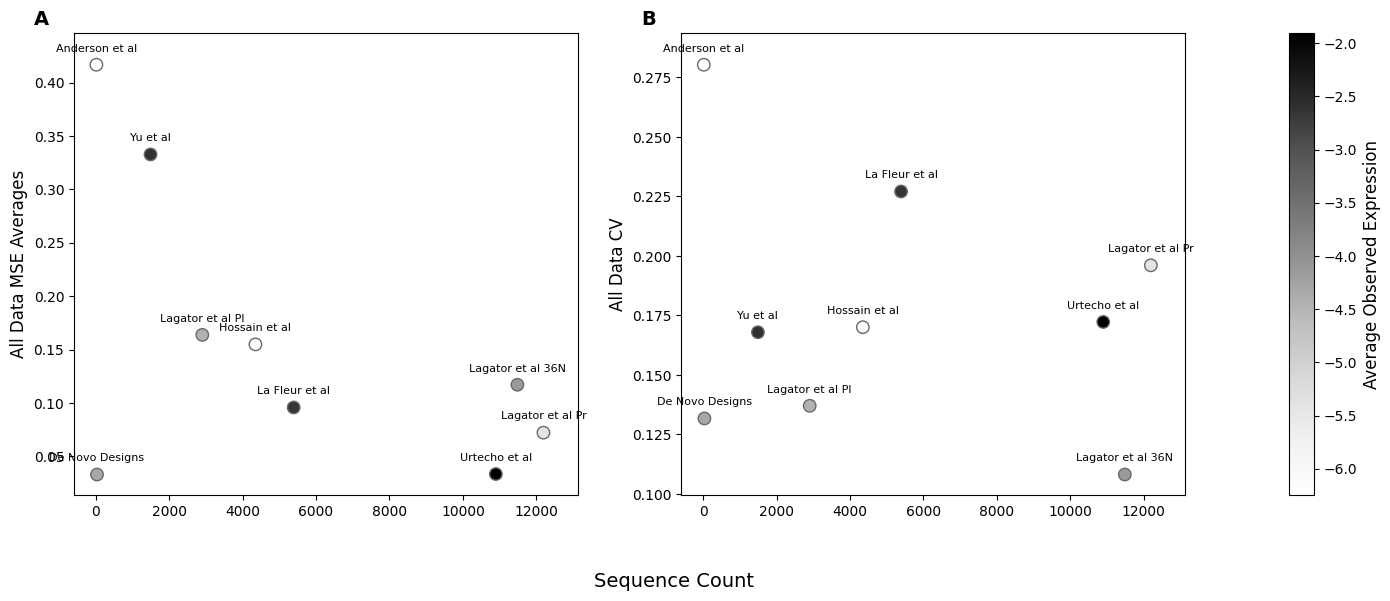

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import cm, colors as mcolors
from sklearn.preprocessing import MinMaxScaler

def adjust_text_pos(idx, x, y, y_offset, label):
    custom_offsets = {
        ('De Novo Designs', None): (1000, 0),
        ('Anderson et al', None): (1000, 0),
        ('Lagator et al Pr', 0): (-1500, -y_offset * 1.5),
        ('Lagator et al Pr', 1): (-500, 0),
        ('Hossain et al', 1): (-500, 0),
        ('Lagator et al 36N', 1): (-1250, 0),
    }
    dx, dy = custom_offsets.get((label, idx)) or custom_offsets.get((label, None), (0, 0))
    return x + dx, y + dy


MinMaxScaler().fit_transform(df[['Observed log(TX/Txref)']].abs())

# Load data
df = pd.read_csv('Data/CNN_file_metrics.csv')

# Setup figure and axes
fig = plt.figure(figsize=(16, 6))
gs = GridSpec(1, 3, width_ratios=[1, 1, 0.05], wspace=0.3)
axes = [fig.add_subplot(gs[0, i]) for i in range(2)]

# Setup colormap normalization
df['Relative Expression'] = MinMaxScaler().fit_transform(df[['Observed Expression']].abs())
df['Relative Expression Range'] = df[['Observed Expression']]


color_col = 'Relative Expression'
norm = mcolors.Normalize(vmin=df[color_col].min(), vmax=df[color_col].max())
cmap = cm.Greys

x_col = 'Sequence Count'
y_cols = ['All Data MSE Averages', 'All Data CV']

# Plot scatter plots
for idx, (ax, y_col) in enumerate(zip(axes, y_cols)):
    scatter = ax.scatter(
        df[x_col],
        df[y_col],
        c=df[color_col],
        cmap=cmap,
        edgecolor='dimgrey',
        s=80
    )

    # Adjust text annotations
    x_offset = (ax.get_xlim()[1] - ax.get_xlim()[0]) * 0.025
    y_offset = (ax.get_ylim()[1] - ax.get_ylim()[0]) * 0.025

    for _, row in df.iterrows():
        x, y = row[x_col], row[y_col] + y_offset
        label = row['File Name']
        ax.text(x, y, label, fontsize=8, ha='center', va='bottom')
        ##adj_x, adj_y = adjust_text_pos(idx, x, y, y_offset, label)
        ##ax.text(adj_x, adj_y, label, fontsize=8, ha='center', va='bottom')

    ax.set_xlim(ax.get_xlim()[0], ax.get_xlim()[1] + x_offset)
    ax.set_ylim(ax.get_ylim()[0], ax.get_ylim()[1] + y_offset)
    ax.set_ylabel(y_col, fontsize=12)
    ax.text(-0.05, 1.05, chr(65 + idx), transform=ax.transAxes,
            ha='right', va='top', fontsize=14, fontweight='bold')

cbar_ax = fig.add_subplot(gs[0, 2])
fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), cax=cbar_ax).set_label(color_col, fontsize=12)
fig.supxlabel(x_col, fontsize=14, y=-0.05)

# Show and save figure
plt.show()


In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import cm, colors as mcolors
from sklearn.preprocessing import MinMaxScaler
from ast import literal_eval


# attempt 1
##df = pd.read_csv('Data/CNN_file_metrics.csv')
##df['Relative Expression'] = df['Observed Expression'].apply(literal_eval).apply(lambda x: [abs(num) for num in x])
##df['Relative Expression'] = df['Relative Expression'].apply(lambda x: MinMaxScaler().fit_transform([[i] for i in x]).flatten())
##df['Relative Expression Range'] = df['Relative Expression'].apply(lambda x: max(x) - min(x))
##df['Relative Expression Range']

df = pd.read_csv('Data/LaFleur_supp.csv')
df['Min-Max Observed'] = MinMaxScaler().fit_transform(df[['Observed log(TX/Txref)']].abs())
df

,File Name,Upstream DNA,Promoter Sequence,Downstream DNA,Observed log(TX/Txref),Normalized Observed log(TX/Txref),Min-Max Observed
0,La Fleur et al,CTCGGTACCAAATTCCAGAA,TTTTCTATCTACGTACTTGACACTATTTCCTATTTCTCTTATAATC...,GAATTCGATCAAATTTCGAG,-3.386326,0.751317,0.248683
1,La Fleur et al,CTCGGTACCAAATTCCAGAA,TTTTCTATCTACGTACTTGACACTATTTCCTATTTCTCTTATAATG...,GAATTCGATCAAATTTCGAG,-3.392439,0.750868,0.249132
2,La Fleur et al,CTCGGTACCAAATTCCAGAA,TTTTCTATCTACGTACTTGACACTATTTCCTATTTCTCTTATAATC...,GAATTCGATCAAATTTCGAG,-3.698903,0.728362,0.271638
3,La Fleur et al,CTCGGTACCAAATTCCAGAA,TTTTCTATCTACGTACTTGACACTATTTCCTATTTCTCTTATAATA...,GAATTCGATCAAATTTCGAG,-3.979249,0.707775,0.292225
4,La Fleur et al,CTCGGTACCAAATTCCAGAA,TTTTCTATCTACGTACTTGACACTATTTCCTATTTCTCTTATAATA...,GAATTCGATCAAATTTCGAG,-2.577630,0.810706,0.189294
...,...,...,...,...,...,...,...
48762,De Novo Designs,AAAGAGACGCTTTCGAGCGTCTTTTTTCGTTTTGGTCCAACA,GGATCCAAATTACGTCCTTACATATTTGTTGACATGGGTAGCCGCT...,AGCTGTCACCGGATGTGCTTTCCGGTCTGATGAGTCCGTGAGGACG...,-7.299041,0.463978,0.536022
48763,De Novo Designs,AAAGAGACGCTTTCGAGCGTCTTTTTTCGTTTTGGTCCAACA,GGATCCGGTGTAGGTAGGCGTCTAATAATTTCTTGACACCAGGGTA...,AGCTGTCACCGGATGTGCTTTCCGGTCTGATGAGTCCGTGAGGACG...,-7.261548,0.466731,0.533269
48764,De Novo Designs,AAAGAGACGCTTTCGAGCGTCTTTTTTCGTTTTGGTCCAACA,GGATCCCACATGTGTCTGTATCTATATATAATTTGACAAACTCCAA...,AGCTGTCACCGGATGTGCTTTCCGGTCTGATGAGTCCGTGAGGACG...,-7.209849,0.470528,0.529472
48765,De Novo Designs,AAAGAGACGCTTTCGAGCGTCTTTTTTCGTTTTGGTCCAACA,GGATCCATATATATATATATATATATATATATTGACACCATTATCA...,AGCTGTCACCGGATGTGCTTTCCGGTCTGATGAGTCCGTGAGGACG...,-7.222543,0.469596,0.530404


64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


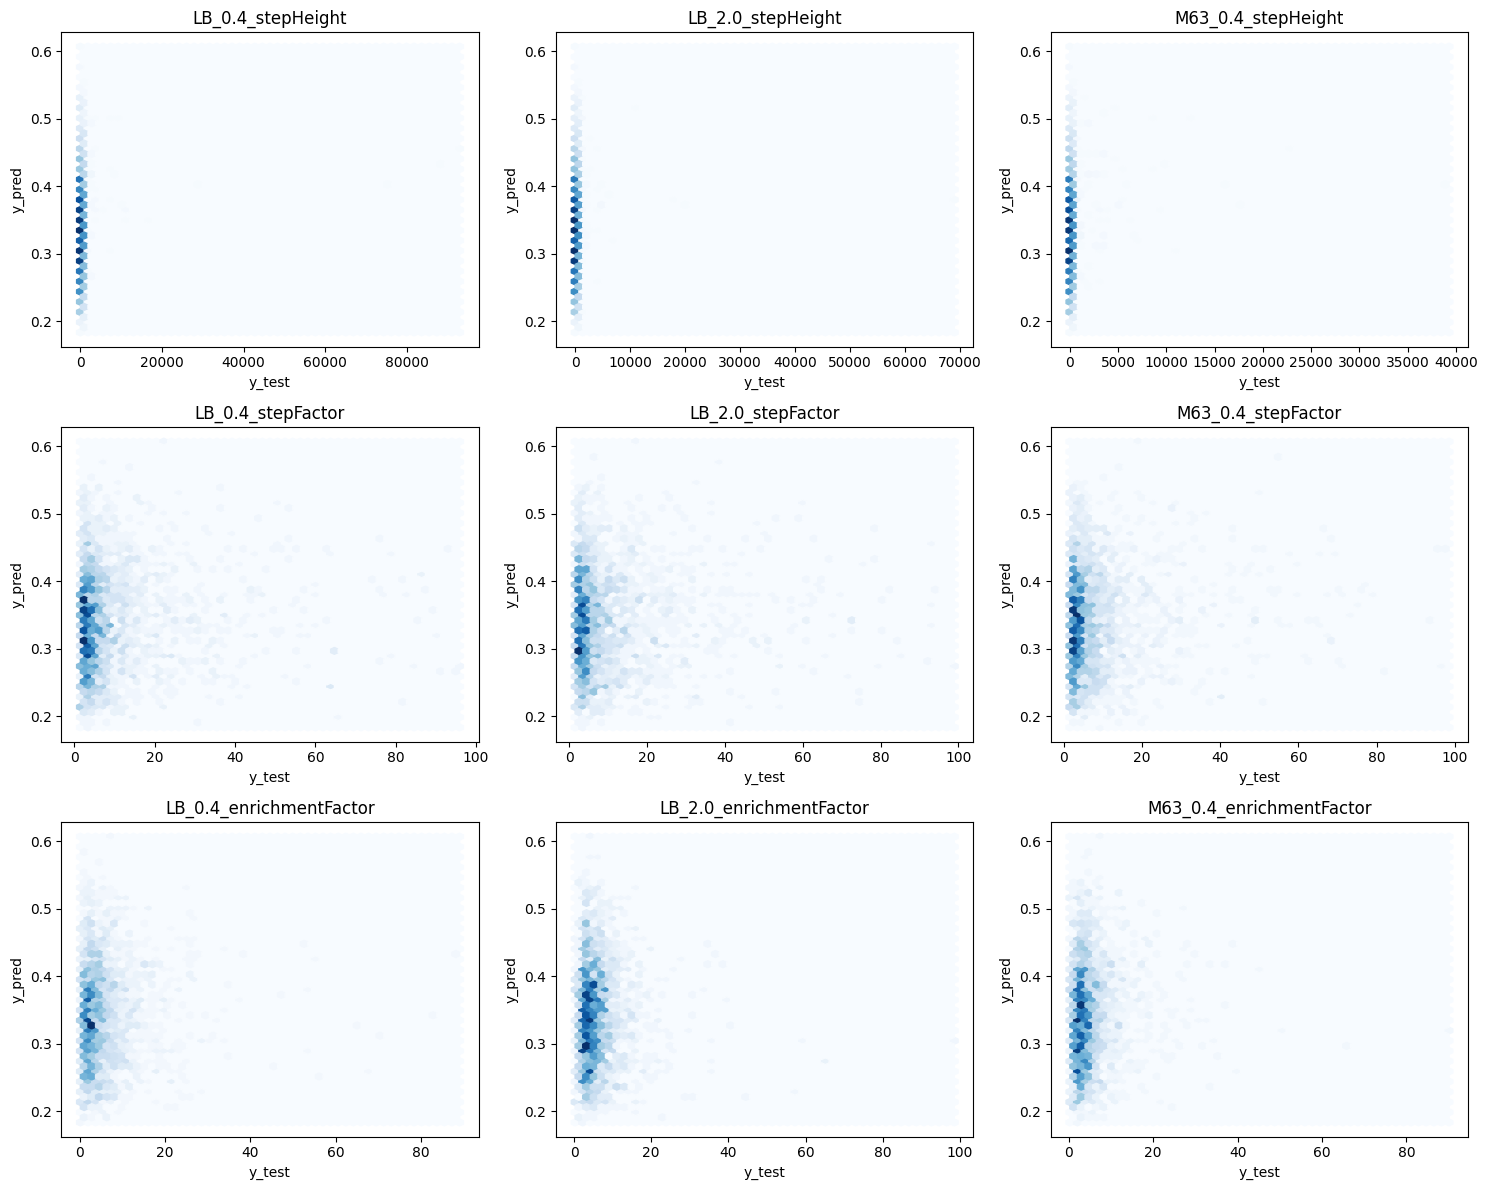

In [44]:
# Thomasan et al data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.saving import load_model  # type: ignore
import seaborn as sns
from sklearn.preprocessing import QuantileTransformer

# -------------------- Data Preprocessing Functions --------------------

def preprocess_sequences(X, max_length=150):
    return np.array([padded_one_hot_encode(seq.zfill(max_length)) for seq in X])

def padded_one_hot_encode(sequence):
    mapping = {'A': [1, 0, 0, 0], 'C': [0, 1, 0, 0], 'G': [0, 0, 1, 0], 'T': [0, 0, 0, 1], '0': [0, 0, 0, 0]}
    return np.array([mapping[nucleotide.upper()] for nucleotide in sequence])

# Load model and data
model = load_model('Models/CNN_6_1_2.keras')
df = pd.read_csv('Data/Thomasan.csv')

# Remove boolean columns
df = df.drop(columns=['LB_0.4_detected', 'LB_2.0_detected', 'M63_0.4_detected', 'LB_0.4_enriched', 'LB_2.0_enriched', 'M63_0.4_enriched'])

# Remove any row with a value of 100.0 or 0
df = df[((df != 100.0) & (df != 0)).all(axis=1)]

# Extract sequences
X_test = df['Sequence']
X_encoded = preprocess_sequences(X_test)

# Predict once
y_pred = model.predict(X_encoded).flatten()

# Set up subplot grid
columns_to_compare = df.columns[1:]
n_cols = 3
n_rows = int(np.ceil(len(columns_to_compare) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(columns_to_compare):
    y_test = df[col].values

    # graph y_test vs y_pred
    axes[i].hexbin(y_test, y_pred, gridsize=50, cmap='Blues')
    axes[i].set_title(col)
    axes[i].set_xlabel('y_test')
    axes[i].set_ylabel('y_pred')


# Remove extra subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()

# plt.savefig('Figures/Figure 6 (Thomasan).pdf', dpi=300, bbox_inches='tight')

plt.show()


In [52]:
# Thomasan et al data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.saving import load_model  # type: ignore
import seaborn as sns
from sklearn.preprocessing import QuantileTransformer
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# -------------------- Data Preprocessing Functions --------------------

def preprocess_sequences(X, max_length=150):
    return np.array([padded_one_hot_encode(seq.zfill(max_length)) for seq in X])

def padded_one_hot_encode(sequence):
    mapping = {'A': [1, 0, 0, 0], 'C': [0, 1, 0, 0], 'G': [0, 0, 1, 0], 'T': [0, 0, 0, 1], '0': [0, 0, 0, 0]}
    return np.array([mapping[nucleotide.upper()] for nucleotide in sequence])

# Load model and data
model = load_model('Models/CNN_6_1_2.keras')
df = pd.read_csv('Data/Thomasan.csv')

# Remove boolean columns
df = df.drop(columns=['LB_0.4_detected', 'LB_2.0_detected', 'M63_0.4_detected', 'LB_0.4_enriched', 'LB_2.0_enriched', 'M63_0.4_enriched'])

# Remove any row with a value of 100.0 or 0
df = df[((df != 100.0) & (df != 0)).all(axis=1)]

# Extract sequences
X_test = df['Sequence']
X_encoded = preprocess_sequences(X_test)

# Predict once
y_pred = model.predict(X_encoded).flatten()

# Quantile transform predicted values
qt_pred = QuantileTransformer(output_distribution='uniform')
y_pred_q = qt_pred.fit_transform(y_pred.reshape(-1, 1)).flatten()

# Set up subplot grid
columns_to_compare = df.columns[1:]

out_dic={}

for i, col in enumerate(columns_to_compare):
    y_test = df[col].values
    qt_test = QuantileTransformer(output_distribution='uniform')
    y_test_q = qt_test.fit_transform(y_test.reshape(-1, 1)).flatten()

    model = LinearRegression()
    model.fit(np.array(y_test_q).reshape(-1, 1), y_pred_q)
    lin_y_pred_q = model.predict(np.array(y_test_q).reshape(-1, 1))

    mse_active = mean_squared_error(y_test_q, lin_y_pred_q)
    rmse_active = root_mean_squared_error(y_test_q, lin_y_pred_q)
    r2_active = r2_score(y_test_q, lin_y_pred_q)

    x = np.array([y_test_q.min(), y_test_q.max()]).reshape(-1, 1)
    y = model.predict(x)

    corr_coef, p_value = pearsonr(y_test_q, y_pred_q)

    textstr = f"{col}\t{mse_active}\t{rmse_active}\t{r2_active}\t{p_value}"
    out_dic[i]= [col, mse_active, rmse_active, r2_active, p_value]

df = pd.DataFrame.from_dict(out_dic, orient='index', columns=["Thomason dataset", "MSE", "RMSE", "Rsquared", "p-value"])
df.to_csv('Figures/TableS1.csv', index=False)
df

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


,Thomason dataset,MSE,RMSE,Rsquared,p-value
0,LB_0.4_stepHeight,0.057568,0.239933,0.309972,1.310080e-14
1,LB_2.0_stepHeight,0.054497,0.233445,0.346693,2.292557e-18
2,M63_0.4_stepHeight,0.059366,0.243651,0.288332,1.172558e-12
3,LB_0.4_stepFactor,0.074196,0.272389,0.110429,1.019898e-02
4,LB_2.0_stepFactor,0.082404,0.287060,0.012180,7.825880e-01
5,M63_0.4_stepFactor,0.074431,0.272820,0.107675,1.231299e-02
6,LB_0.4_enrichmentFactor,0.077051,0.277581,0.076195,7.915618e-02
7,LB_2.0_enrichmentFactor,0.079966,0.282783,0.041398,3.446547e-01
8,M63_0.4_enrichmentFactor,0.069402,0.263442,0.167984,7.007203e-05


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


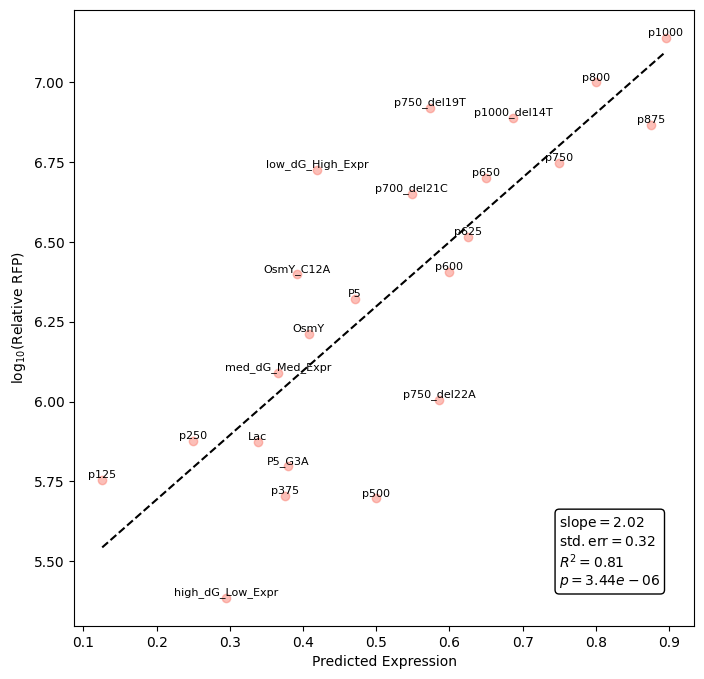

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras


#  ----------------- Preprocessing Functions -----------------

def pad(sequence):
    sequence = sequence.replace('_', '')
    desired_length = 150
    
    # add sepcial padding for GFP (not inserted in the plasmid)
    if sequence == 'CGATGGTGTCAACGTAAATGCATGCCGCTGGTCTCT':
        upstream = 'TATCATGCCATACCGCGAAAGGTTTTGCACCATT'
    else:
        upstream = 'AATACTAGAGGTCTTCCGAC'

    downstream = 'GCGGGAAGACAACTAGGGG'
    sequence = upstream + sequence + downstream
    return sequence.zfill(desired_length)

def padded_one_hot_encode(sequence):
    mapping = {'A': [1,0,0,0], 'C': [0,1,0,0], 'G': [0,0,1,0], 'T': [0,0,0,1], '0': [0,0,0,0]}
    encoding = [mapping[nucleotide.upper()] for nucleotide in sequence]
    return encoding

# ------------- Load the RPF Data -------------

df = pd.read_table('Data/RFP/Observed_RFP_GFP.txt')
seq_map = pd.read_table('Data/RFP/Sequences.txt')

df.loc[:, 'Ec'] = df['Ec'].astype(int)
seq_map.loc[:, 'Ec'] = seq_map['Ec'].astype(int)
df = df.merge(seq_map, on='Ec', how='left')

# load the model
model = keras.saving.load_model('Models/CNN_6_1_2.keras')

# preprocess the sequences
sequences = df['sequence'].apply(lambda x: x.replace('_', '')).tolist()
padded_sequences = [pad(seq) for seq in sequences]
encoded_sequences = np.array([padded_one_hot_encode(seq) for seq in padded_sequences])

# predict the RFP values
df['Pred_RFP'] = model.predict(encoded_sequences, batch_size=32, verbose=1)

# ----------------- Plot Predicted vs Observed RFP -----------------

from scipy.stats import linregress

df_filtered = df.copy()
df_filtered = df_filtered[df_filtered['Description'] != 'pClone_GFP']
df_filtered['log_RFP'] = np.log10(df_filtered['Rel_RFP'])

x_vals = []
y_vals = []

plt.figure(figsize=(8, 8))
for idx, row in df_filtered.iterrows():
    name = row['Description']

    x = row['Pred_RFP']
    y = row['log_RFP']

    x_vals.append(x)
    y_vals.append(y)

    plt.scatter(x, y, color='salmon', label=name, alpha=0.5)
    plt.text(x, y, name, fontsize=8, ha='center', va='bottom')

slope, intercept, r_value, p_value, std_err = linregress(x_vals, y_vals)

x_range = np.linspace(min(x_vals), max(x_vals), 100)
y_pred = slope * x_range + intercept
plt.plot(x_range, y_pred, color='black', linestyle='--', label='Linear Fit')

plt.xlabel('Predicted Expression')
plt.ylabel('log$_{10}$(Relative RFP)')

textstr = '\n'.join((
        r'$\mathrm{slope}=%.2f$' % slope,
        r'$\mathrm{std.err}=%.2f$' % std_err,
        r'$R^2=%.2f$' % r_value,
        r'$p=%.2e$' % p_value
    ))

props = dict(boxstyle='round', facecolor='white')
plt.text(0.75, 5.65, textstr, fontsize=10, verticalalignment='top', bbox=props)
# fig.savefig('Figures/Figure 8.pdf', dpi=300, bbox_inches='tight')

plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
from matplotlib import cm, colors as mcolors
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


# -------------------------- Helper Functions --------------------------

def adjust_text_pos_train(idx, x, y, y_offset, label):
    custom_offsets = {
        ('De Novo Designs', None): (1000, 0),
        ('Anderson et al', None): (1000, 0),
        ('Lagator et al Pr', 0): (-1500, -y_offset * 1.5),
        ('Lagator et al Pr', 1): (-500, 0),
        ('Hossain et al', 1): (-500, 0),
        ('Lagator et al 36N', 1): (-1250, 0),
    }
    dx, dy = custom_offsets.get((label, idx)) or custom_offsets.get((label, None), (0, 0))
    return x + dx, y + dy

def adjust_text_pos_test(idx, x, y, y_offset, label):
    custom_offsets = {
        ('De Novo Designs', None): (1000, 0),
        ('Anderson et al', None): (1000, 0),
        ('Lagator et al Pl', 0): (-1250, 0),
        ('Lagator et al Pl', 1): (1000, 0),
        ('Lagator et al Pr', None): (-500, 0),
    }
    dx, dy = custom_offsets.get((label, idx)) or custom_offsets.get((label, None), (0, 0))
    return x + dx, y + dy

# -------------------------- Load & Preprocess Data --------------------------

df = pd.read_csv('Data/CNN_file_metrics.csv')
df_LaFleur = pd.read_csv('Data/LaFleur_supp.csv')
df_LaFleur['Min-Max Observed'] = MinMaxScaler().fit_transform(
    df_LaFleur[['Observed log(TX/Txref)']].abs()
)
observed_range = (
    df_LaFleur.groupby('File Name')['Min-Max Observed']
    .agg(lambda x: x.max() - x.min())
    .reset_index()
    .rename(columns={'Min-Max Observed': 'Observed Range'})
)
df = df.merge(observed_range, on='File Name', how='left')

# -------------------------- Setup Figure --------------------------

fig = plt.figure(figsize=(16, 12))
gs = GridSpec(3, 3, width_ratios=[1, 1, 0.05], wspace=0.3, hspace=0.3)
axes = [fig.add_subplot(gs[i // 2, i % 2]) for i in range(4)]

# -------------------------- Plot Train --------------------------

train_y_cols = ['Training Data MSE Averages', 'Training Data CV']
train_color_col = 'Within-File Hamming Distance'
train_norm = mcolors.Normalize(vmin=df[train_color_col].min(), vmax=df[train_color_col].max())
cmap = cm.Greys
x_col = 'Sequence Count'

for idx, (ax, y_col) in enumerate(zip(axes[:2], train_y_cols)):
    scatter = ax.scatter(
        df[x_col],
        df[y_col],
        c=df[train_color_col],
        cmap=cmap,
        edgecolor='dimgrey',
        s=80
    )
    x_offset = (ax.get_xlim()[1] - ax.get_xlim()[0]) * 0.025
    y_offset = (ax.get_ylim()[1] - ax.get_ylim()[0]) * 0.025
    for _, row in df.iterrows():
        x, y = row[x_col], row[y_col] + y_offset
        label = row['File Name']
        adj_x, adj_y = adjust_text_pos_train(idx, x, y, y_offset, label)
        ax.text(adj_x, adj_y, label, fontsize=8, ha='center', va='bottom')
    ax.set_xlim(ax.get_xlim()[0], ax.get_xlim()[1] + x_offset)
    ax.set_ylim(ax.get_ylim()[0], ax.get_ylim()[1] + y_offset)
    ax.set_ylabel(y_col, fontsize=12)
    if(idx==0):
        ax.text(-0.15, 1.05, chr(65 + idx), transform=ax.transAxes, ha='right', va='top', fontsize=14, fontweight='bold')
    else:
        ax.text(-0.125, 1.05, chr(65 + idx), transform=ax.transAxes, ha='right', va='top', fontsize=14, fontweight='bold')

cbar_ax_train = fig.add_subplot(gs[0, 2])
fig.colorbar(cm.ScalarMappable(norm=train_norm, cmap=cmap), cax=cbar_ax_train).set_label(train_color_col, fontsize=12)

# -------------------------- Plot Test --------------------------

test_y_cols = ['All Data MSE Averages', 'All Data CV']
test_color_col = 'Observed Range'
test_norm = mcolors.Normalize(vmin=df[test_color_col].min(), vmax=df[test_color_col].max())

cmap = cm.Reds

for idx, (ax, y_col) in enumerate(zip(axes[2:4], test_y_cols)):
    scatter = ax.scatter(
        df[x_col],
        df[y_col],
        c=df[test_color_col],
        cmap=cmap,
        edgecolor='dimgrey',
        s=80
    )
    x_offset = (ax.get_xlim()[1] - ax.get_xlim()[0]) * 0.025
    y_offset = (ax.get_ylim()[1] - ax.get_ylim()[0]) * 0.025
    for _, row in df.iterrows():
        x, y = row[x_col], row[y_col] + y_offset
        label = row['File Name']
        adj_x, adj_y = adjust_text_pos_test(idx, x, y, y_offset, label)
        ax.text(adj_x, adj_y, label, fontsize=8, ha='center', va='bottom')
    ax.set_xlim(ax.get_xlim()[0], ax.get_xlim()[1] + x_offset)
    ax.set_ylim(ax.get_ylim()[0], ax.get_ylim()[1] + y_offset)
    ax.set_ylabel(y_col, fontsize=12)
    if(idx==0):
        ax.text(-0.15, 1.05, chr(67 + idx), transform=ax.transAxes, ha='right', va='top', fontsize=14, fontweight='bold')
    else:
        ax.text(-0.125, 1.05, chr(67 + idx), transform=ax.transAxes, ha='right', va='top', fontsize=14, fontweight='bold')

cbar_ax_test = fig.add_subplot(gs[1, 2])
fig.colorbar(cm.ScalarMappable(norm=test_norm, cmap=cmap), cax=cbar_ax_test).set_label('Transformed Observed Expression Range', fontsize=12)
fig.supxlabel(x_col, fontsize=14, x= .275, y=0.345)


# -------------------------- Fig E --------------------------


# Load and process data
df = pd.read_csv('Data/LaFleur_supp.csv')
df['Min-Max Observed'] = MinMaxScaler().fit_transform(df[['Observed log(TX/Txref)']].abs())

# Split into train/test
indices = np.arange(len(df))
train_idx, test_idx = train_test_split(indices, test_size=0.2, random_state=42)
df['Split'] = 'Train'
df.loc[test_idx, 'Split'] = 'Test'

axesF= fig.add_subplot(gs[2,:2])

sns.boxplot(data=df, x='Min-Max Observed', y='File Name', hue='Split', palette={'Train': 'skyblue', 'Test': 'lightgreen'})
axesF.text(-1.35, -0.2, chr(69), transform=ax.transAxes, ha='right', va='top', fontsize=14, fontweight='bold')
axesF.set_xlabel('Min-Max Observed')
axesF.set_ylabel('File Name')
axesF.legend()

pos2 = axesF.get_position()
# Calculate the new position (reduce horizontal space)
new_x0 = pos2.x0 + 0.05  # Reduce horizontal space by 0.05
##new_width = pos2.width + 0.05  # Increase width to compensate
new_pos = [new_x0, pos2.y0, pos2.width, pos2.height]

# Set the new position of the second subplot
axesF.set_position(new_pos)

plt.tight_layout()
##fig.savefig('Figures/FigureS1.pdf', dpi=300, bbox_inches='tight')
plt.show()



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
import matplotlib.patches as patches

from Generators.CNN import CNN
from itertools import product

# ---------- Functions ----------
def hamming_distance(seq1, seq2):
    return sum(c1 != c2 for c1, c2 in zip(seq1, seq2))

def generate_hybrids(A, B, up, down):
    differing_indices = [i for i in range(len(A)) if A[i] != B[i]]
    hybrids, dist_to_As, dist_to_Bs = [], [], []

    for choice in product([0, 1], repeat=len(differing_indices)):
        hybrid_chars = list(A)
        for idx, bit in zip(differing_indices, choice):
            hybrid_chars[idx] = B[idx] if bit == 1 else A[idx]

        hybrid = ''.join(hybrid_chars)
        dist_to_A = sum(1 for i in differing_indices if hybrid_chars[i] != A[i])
        dist_to_B = sum(1 for i in differing_indices if hybrid_chars[i] != B[i])

        hybrids.append(up + hybrid + down)
        dist_to_As.append(dist_to_A)
        dist_to_Bs.append(dist_to_B)

    return hybrids, dist_to_As, dist_to_Bs

def matched_nucleotides(s, target, min_shared=5):
    t_len = len(target)
    nucleotide_map = [False] * len(s)
    for i in range(len(s) - t_len + 1):
        window = s[i:i + t_len]
        match_positions = [j for j in range(t_len) if window[j] == target[j]]
        if len(match_positions) >= min_shared:
            for j in match_positions:
                nucleotide_map[i + j] = True
    return nucleotide_map

# ---------- Load Model & Data ----------
cnn = CNN('Models/CNN_6_1_2.keras')

results_df = pd.read_csv('Data/optimizer_evaluation_results.csv')
results_df = results_df[(results_df['optimizer'] == 'Genetic Algorithm') & (results_df['target_expression'] == 1)]
results_df = results_df.sort_values(by='error')

GA_1 = results_df['sequence'].iloc[0][20:50]
GA_2 = results_df['sequence'].iloc[1][20:50]
up = 'AATACTAGAGGTCTTCCGAC'
down = 'GTGTGGGCGGGAAGACAACTAGGGG'

hybrids, dist_to_1, dist_to_2 = generate_hybrids(GA_1, GA_2, up, down)
predictions = cnn.predict(cnn.preprocess(hybrids))

grouped = {}
for dist, pred, seq in zip(dist_to_2, predictions, hybrids):
    grouped.setdefault(dist, []).append((seq, pred))

# ---------- B and C Data ----------
GA_df = pd.read_csv('Data/GA_220_sequence_analysis.csv')
bins = np.linspace(0, 1, 11)
labels = [f"{b:.1f}" for b in bins[:-1]]
GA_df['prediction_bin'] = pd.cut(GA_df['prediction'], bins=bins, labels=labels, include_lowest=True)

plot_df = pd.DataFrame()
for motif in ['35', '10']:
    for kind in ['consensus', 'near_consensus']:
        temp_df = GA_df[['prediction_bin']].copy()
        temp_df['count'] = GA_df[f'{kind}_h{motif}_count']
        temp_df['Type'] = f"{'Consensus' if kind == 'consensus' else 'Near Consensus'} -{motif}"
        plot_df = pd.concat([plot_df, temp_df])

color_map = {
    'Consensus -35': 'orange',
    'Near Consensus -35': 'bisque',
    'Consensus -10': 'royalblue',
    'Near Consensus -10': 'lightsteelblue',
}

# ---------- Combined Plot ----------
fig = plt.figure(figsize=(14, 14))
gs = gridspec.GridSpec(3, 2, height_ratios=[3, 2, 3])

axA = fig.add_subplot(gs[0, :])
axB = fig.add_subplot(gs[1, 0])
axC = fig.add_subplot(gs[1, 1], sharey=axB)
axD = fig.add_subplot(gs[2, :])

# ----------- Figure A -----------
sorted_dists = sorted(grouped.keys())
for i in range(len(sorted_dists) - 1):
    d1, d2 = sorted_dists[i], sorted_dists[i + 1]
    for seq1, pred1 in grouped[d1]:
        for seq2, pred2 in grouped[d2]:
            if hamming_distance(seq1, seq2) == 1:
                axA.plot([d1, d2], [pred1, pred2], color='grey', alpha=0.3, linewidth=0.8)

for dist, items in grouped.items():
    items.sort(key=lambda x: x[0])
    x_vals = [dist] * len(items)
    y_vals = [pred for _, pred in items]
    axA.scatter(x_vals, y_vals, color='black', alpha=0.6, zorder=3)

h35, h10 = 'TTGACA', 'TATAAT'
fontsize = 8
char_width = 0.13
underline_offset = 0.001
underline_length = 0.07

h35_match_GA1 = matched_nucleotides(GA_1, h35)
h10_match_GA1 = matched_nucleotides(GA_1, h10)
h35_match_GA2 = matched_nucleotides(GA_2, h35)
h10_match_GA2 = matched_nucleotides(GA_2, h10)

x0, y0 = 0, 0.8625
for i, (c1, c2) in enumerate(zip(GA_1, GA_2)):
    if h35_match_GA2[i]: color = 'orange'
    elif h10_match_GA2[i]: color = 'royalblue'
    elif c1 == c2: color = 'black'
    else: color = 'black'
    x_char = x0 + i * char_width
    axA.text(x_char, y0, c2, fontsize=fontsize, ha='center', color=color)
    if c1 != c2:
        axA.plot([x_char - underline_length/2, x_char + underline_length/2], [y0 - underline_offset]*2, color='black', linewidth=0.5)

x1, y1 = 11, 0.7
for i, (c1, c2) in enumerate(zip(GA_1, GA_2)):
    if h35_match_GA1[i]: color = 'orange'
    elif h10_match_GA1[i]: color = 'royalblue'
    elif c1 == c2: color = 'black'
    else: color = 'black'
    x_char = x1 - (len(GA_2) - i - 1) * char_width
    axA.text(x_char, y1, c1, fontsize=fontsize, ha='center', color=color)
    if c1 != c2:
        axA.plot([x_char - underline_length/2, x_char + underline_length/2], [y1 - underline_offset]*2, color='black', linewidth=0.5)

axA.set_xticks(range(min(sorted_dists), max(sorted_dists)+1))
axA.set_xlabel('Number of Nucleotide Substitutions')
axA.set_ylabel('Predicted Expression')
axA.text(-0.025, 1.05, 'A', transform=axA.transAxes, fontsize=14, fontweight='bold')

# ----------- Figure B & C -----------
for i, (ax, motif) in enumerate(zip([axB, axC], ['35', '10'])):
    subset = plot_df[plot_df['Type'].str.contains(f'-{motif}')]
    sns.boxplot(
        data=subset, x='prediction_bin', y='count', hue='Type',
        palette={k: v for k, v in color_map.items() if f'-{motif}' in k},
        ax=ax
    )
    ax.legend(loc='upper left')
    ax.set_xlabel('Target Expression')
    if ax is axC:
        plt.setp(ax.get_yticklabels(), visible=False)
        ax.set_ylabel("")
    else:
        ax.set_ylabel('Number of Occurrences')
    ax.text(-0.05, 1.05, 'B' if motif == '35' else 'C', transform=ax.transAxes, fontsize=14, fontweight='bold')

# ----------- Figure D -----------
img = plt.imread('Figures/png/Figure7B.png')
axD.imshow(img)
axD.axis('off')
axD.text(-0.025, 0.95, 'D', transform=axD.transAxes, fontsize=14, fontweight='bold')

plt.tight_layout()
plt.subplots_adjust(hspace=0.3)

plt.show()


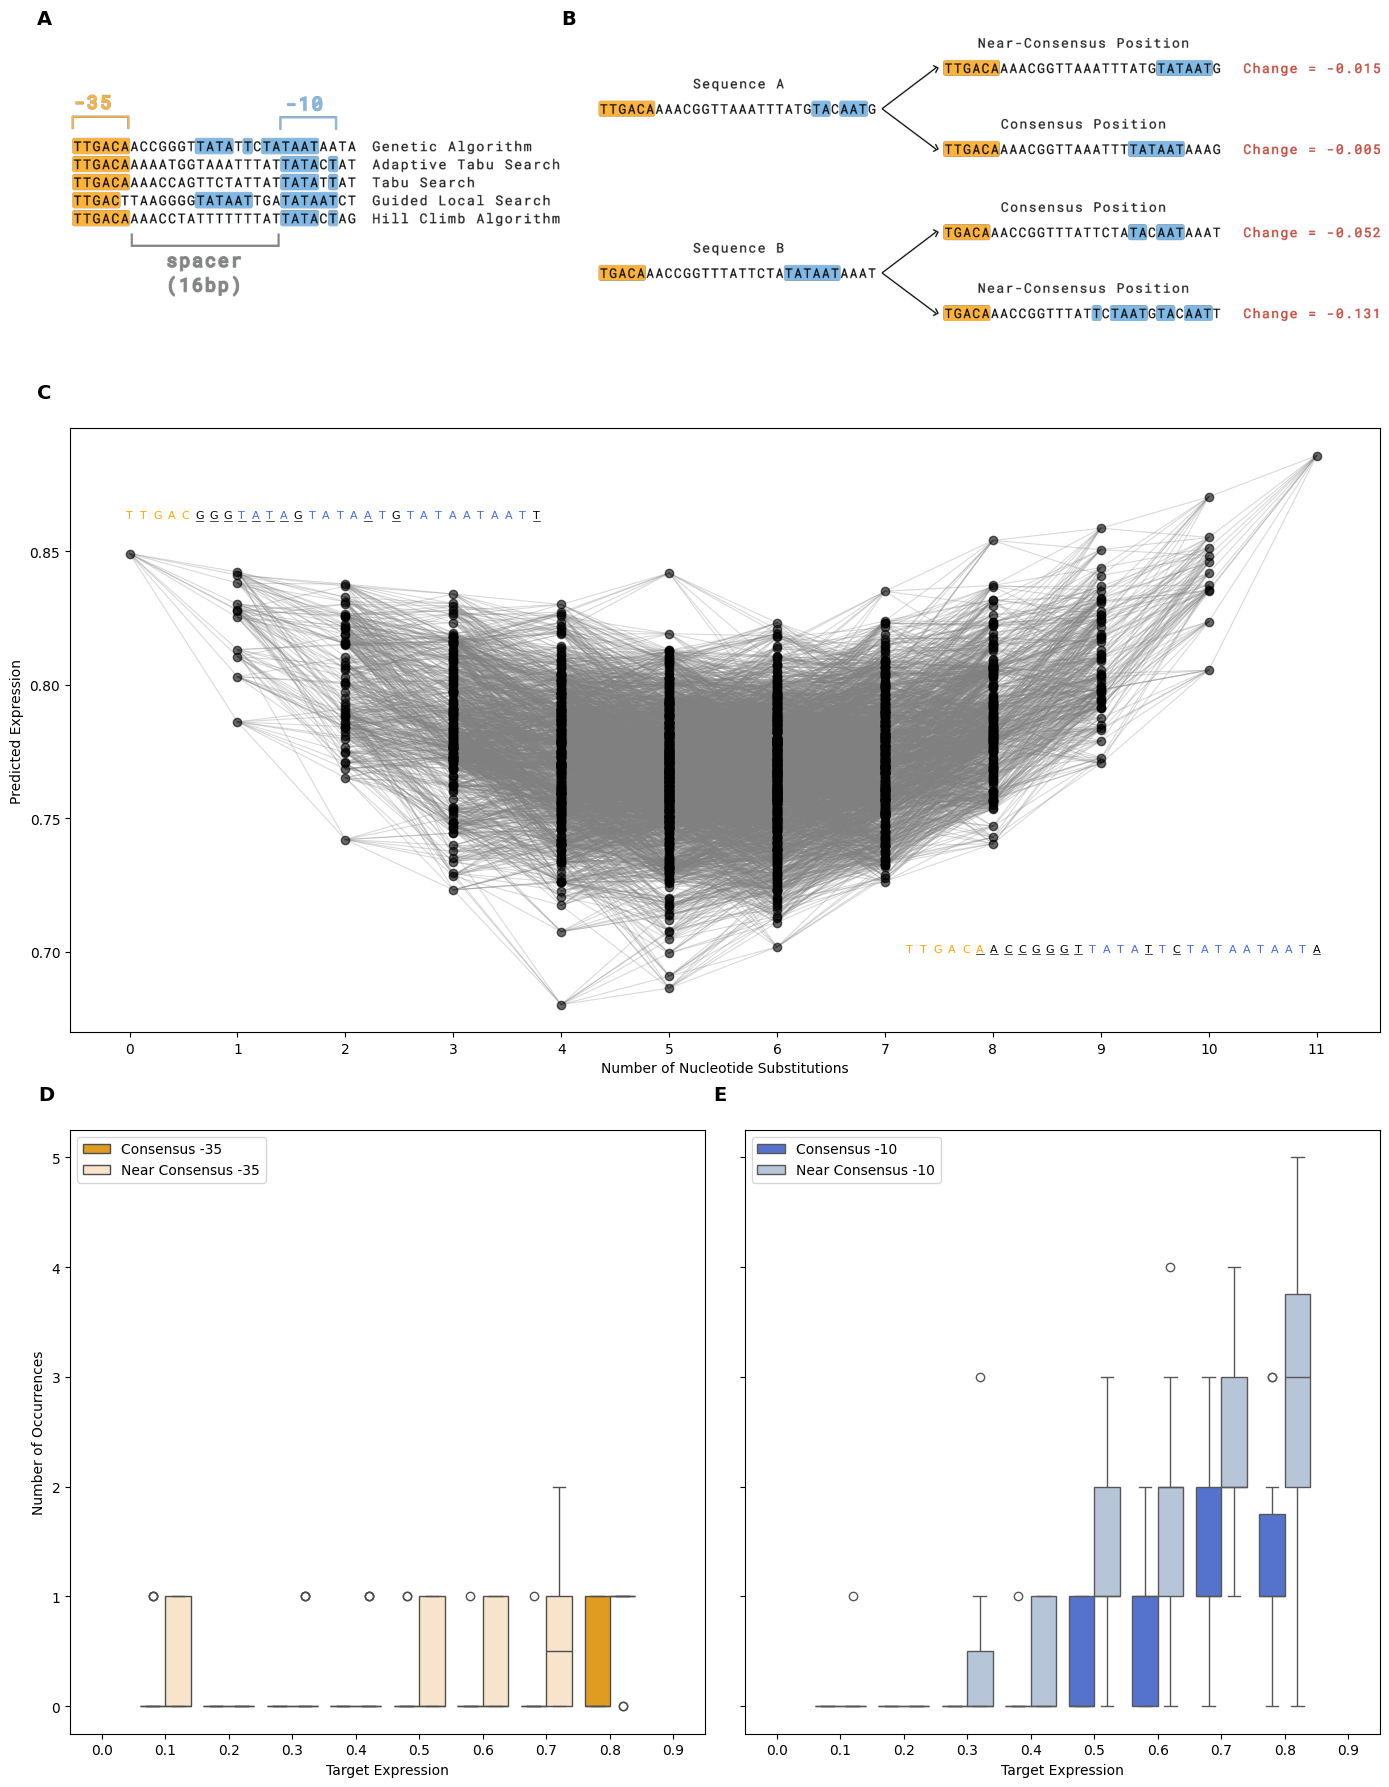

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
import matplotlib.patches as patches

from Generators.CNN import CNN
from itertools import product

# ---------- Functions ----------
def hamming_distance(seq1, seq2):
    return sum(c1 != c2 for c1, c2 in zip(seq1, seq2))

def generate_hybrids(A, B, up, down):
    differing_indices = [i for i in range(len(A)) if A[i] != B[i]]
    hybrids, dist_to_As, dist_to_Bs = [], [], []

    for choice in product([0, 1], repeat=len(differing_indices)):
        hybrid_chars = list(A)
        for idx, bit in zip(differing_indices, choice):
            hybrid_chars[idx] = B[idx] if bit == 1 else A[idx]

        hybrid = ''.join(hybrid_chars)
        dist_to_A = sum(1 for i in differing_indices if hybrid_chars[i] != A[i])
        dist_to_B = sum(1 for i in differing_indices if hybrid_chars[i] != B[i])

        hybrids.append(up + hybrid + down)
        dist_to_As.append(dist_to_A)
        dist_to_Bs.append(dist_to_B)

    return hybrids, dist_to_As, dist_to_Bs

def matched_nucleotides(s, target, min_shared=5):
    t_len = len(target)
    nucleotide_map = [False] * len(s)
    for i in range(len(s) - t_len + 1):
        window = s[i:i + t_len]
        match_positions = [j for j in range(t_len) if window[j] == target[j]]
        if len(match_positions) >= min_shared:
            for j in match_positions:
                nucleotide_map[i + j] = True
    return nucleotide_map

# ---------- Load Model & Data ----------
cnn = CNN('Models/CNN_6_1_2.keras')

results_df = pd.read_csv('Data/optimizer_evaluation_results.csv')
results_df = results_df[(results_df['optimizer'] == 'Genetic Algorithm') & (results_df['target_expression'] == 1)]
results_df = results_df.sort_values(by='error')

GA_1 = results_df['sequence'].iloc[0][20:50]
GA_2 = results_df['sequence'].iloc[1][20:50]
up = 'AATACTAGAGGTCTTCCGAC'
down = 'GTGTGGGCGGGAAGACAACTAGGGG'

hybrids, dist_to_1, dist_to_2 = generate_hybrids(GA_1, GA_2, up, down)
predictions = cnn.predict(cnn.preprocess(hybrids))

grouped = {}
for dist, pred, seq in zip(dist_to_2, predictions, hybrids):
    grouped.setdefault(dist, []).append((seq, pred))

# ---------- B and C Data ----------
GA_df = pd.read_csv('Data/GA_220_sequence_analysis.csv')
bins = np.linspace(0, 1, 11)
labels = [f"{b:.1f}" for b in bins[:-1]]
GA_df['prediction_bin'] = pd.cut(GA_df['prediction'], bins=bins, labels=labels, include_lowest=True)

plot_df = pd.DataFrame()
for motif in ['35', '10']:
    for kind in ['consensus', 'near_consensus']:
        temp_df = GA_df[['prediction_bin']].copy()
        temp_df['count'] = GA_df[f'{kind}_h{motif}_count']
        temp_df['Type'] = f"{'Consensus' if kind == 'consensus' else 'Near Consensus'} -{motif}"
        plot_df = pd.concat([plot_df, temp_df])

color_map = {
    'Consensus -35': 'orange',
    'Near Consensus -35': 'bisque',
    'Consensus -10': 'royalblue',
    'Near Consensus -10': 'lightsteelblue',
}

fig = plt.figure(figsize=(14, 18))
gs = gridspec.GridSpec(3, 2, height_ratios=[2, 4, 4])

##axA = fig.add_subplot(gs[0, :2])
##axB = fig.add_subplot(gs[0, 2:])
axAB = fig.add_subplot(gs[0, :])
axC = fig.add_subplot(gs[1, :])
axD = fig.add_subplot(gs[2, :1])
axE = fig.add_subplot(gs[2, 1:], sharey=axD)

# ----------- Figure A -----------
##imgA = plt.imread('Figures/png/Figure7A.png')
##axA.imshow(imgA)
##axA.axis('off')
##posA = axA.get_position()
##new_xA = posA.x0 - .3  # Reduce horizontal space by 0.05
##new_yA = posA.y0 #- .05
##new_width = posA.width #* 0.2 # Reduce width of A
##new_height = posA.height #* 0.2 # Reduce width of A
##new_pos = [new_xA, new_yA, new_width, new_height]
##axA.set_position(new_pos)# Set the new position of the subplot 

##axA.set_facecolor('white')

# Remove axes spines
##axA.spines['top'].set_visible(False)
##axA.spines['right'].set_visible(False)
##axA.spines['bottom'].set_visible(False)
##axA.spines['left'].set_visible(False)

# Remove ticks and labels
##axA.set_xticks([])
##axA.set_yticks([])
##axA.text(-0.09, 1.05, 'A', transform=axA.transAxes, fontsize=14, fontweight='bold')

# ----------- Figure B -----------
##imgB = plt.imread('Figures/png/Figure7B.png')
##axB.imshow(imgB)
##axB.axis('off')
##posB = axB.get_position()
##new_xB = posB.x0 - .2  # Reduce horizontal space by 0.05
##new_width = posB.width * 1.25 # Reduce width of A
##new_pos = [new_xB, posB.y0, posB.width, posB.height]
##axB.set_position(new_pos)

# Remove axes spines
##axB.spines['top'].set_visible(False)
##axB.spines['right'].set_visible(False)
##axB.spines['bottom'].set_visible(False)
##axB.spines['left'].set_visible(False)

# Remove ticks and labels
##axB.set_xticks([])
##axB.set_yticks([])
##axB.text(-.1, 1.05, 'B', transform=axB.transAxes, fontsize=14, fontweight='bold')

# ----------- Figure AB -----------
imgAB = plt.imread('Figures/png/Figure7AB.png')
axAB.imshow(imgAB)
axAB.axis('off')
axAB.text(-0.025, 1.05, 'A', transform=axAB.transAxes, fontsize=14, fontweight='bold')
axAB.text(.38, 1.05, 'B', transform=axAB.transAxes, fontsize=14, fontweight='bold')

# ----------- Figure C (was A) -----------
sorted_dists = sorted(grouped.keys())
for i in range(len(sorted_dists) - 1):
    d1, d2 = sorted_dists[i], sorted_dists[i + 1]
    for seq1, pred1 in grouped[d1]:
        for seq2, pred2 in grouped[d2]:
            if hamming_distance(seq1, seq2) == 1:
                axC.plot([d1, d2], [pred1, pred2], color='grey', alpha=0.3, linewidth=0.8)

for dist, items in grouped.items():
    items.sort(key=lambda x: x[0])
    x_vals = [dist] * len(items)
    y_vals = [pred for _, pred in items]
    axC.scatter(x_vals, y_vals, color='black', alpha=0.6, zorder=3)

h35, h10 = 'TTGACA', 'TATAAT'
fontsize = 8
char_width = 0.13
underline_offset = 0.001
underline_length = 0.07

h35_match_GA1 = matched_nucleotides(GA_1, h35)
h10_match_GA1 = matched_nucleotides(GA_1, h10)
h35_match_GA2 = matched_nucleotides(GA_2, h35)
h10_match_GA2 = matched_nucleotides(GA_2, h10)

x0, y0 = 0, 0.8625
for i, (c1, c2) in enumerate(zip(GA_1, GA_2)):
    color = 'black'
    if h35_match_GA2[i]: color = 'orange'
    elif h10_match_GA2[i]: color = 'royalblue'
    x_char = x0 + i * char_width
    axC.text(x_char, y0, c2, fontsize=fontsize, ha='center', color=color)
    if c1 != c2:
        axC.plot([x_char - underline_length/2, x_char + underline_length/2], [y0 - underline_offset]*2, color='black', linewidth=0.5)

x1, y1 = 11, 0.7
for i, (c1, c2) in enumerate(zip(GA_1, GA_2)):
    color = 'black'
    if h35_match_GA1[i]: color = 'orange'
    elif h10_match_GA1[i]: color = 'royalblue'
    x_char = x1 - (len(GA_2) - i - 1) * char_width
    axC.text(x_char, y1, c1, fontsize=fontsize, ha='center', color=color)
    if c1 != c2:
        axC.plot([x_char - underline_length/2, x_char + underline_length/2], [y1 - underline_offset]*2, color='black', linewidth=0.5)

axC.set_xticks(range(min(sorted_dists), max(sorted_dists)+1))
axC.set_xlabel('Number of Nucleotide Substitutions')
axC.set_ylabel('Predicted Expression')
axC.text(-0.025, 1.05, 'C', transform=axC.transAxes, fontsize=14, fontweight='bold')

# ----------- Figures D & E -----------
for i, (ax, motif) in enumerate(zip([axD, axE], ['35', '10'])):
    subset = plot_df[plot_df['Type'].str.contains(f'-{motif}')]

    sns.boxplot(
        data=subset, x='prediction_bin', y='count', hue='Type',
        palette={k: v for k, v in color_map.items() if f'-{motif}' in k},
        ax=ax
    )

    ax.legend(loc='upper left')
    ax.set_xlabel('Target Expression')

    if ax is axE:
        plt.setp(ax.get_yticklabels(), visible=False)
        ax.set_ylabel("")
    else:
        ax.set_ylabel('Number of Occurrences')

    ax.text(-0.05, 1.05, 'D' if motif == '35' else 'E', transform=ax.transAxes, fontsize=14, fontweight='bold')

plt.tight_layout()
##fig.savefig('Figures/Figure7.pdf', dpi=300, bbox_inches='tight')

plt.show()

